In [213]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import obspy.io.segy.core as op

In [214]:
dir = '../data/DAS/SISSLE/2023p218553/'
files = sorted(os.listdir(dir))
sissle = np.hstack([h5py.File(dir + file)['DAS'][:].T for file in files])

sissle = sissle[81:5000, :]
sissle /= sissle.std()

In [215]:
file = '../data/das/FORGE1/FORGE_78-32_iDASv3-P11_UTC190423213209.sgy'
stream = op._read_segy(file, format='segy')
forge = np.vstack([trace.data for trace in stream])

forge = forge[200:960 + 200, 1000:5000]
forge /= forge.std()

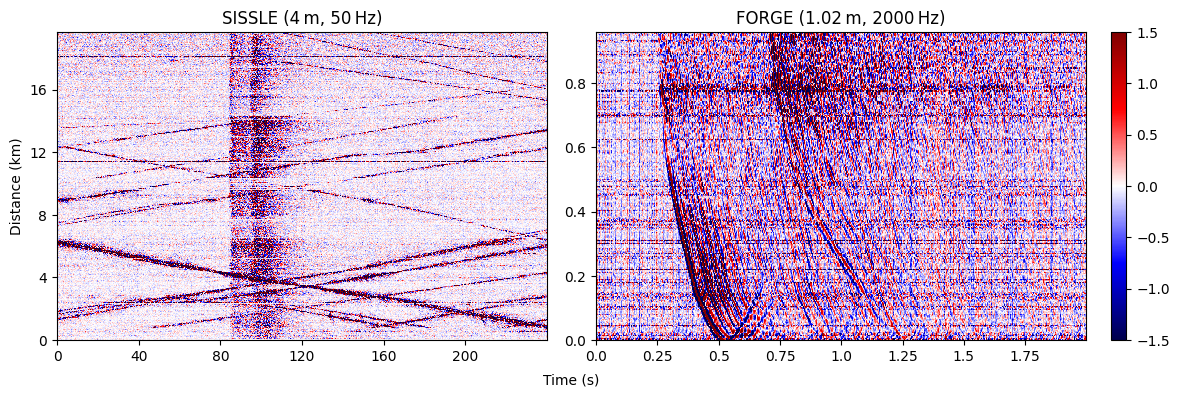

In [216]:
clip = 1.5
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

im = ax[0].imshow(sissle, origin='lower', aspect='auto', cmap='seismic', interpolation='none', vmin=-clip, vmax=clip)
ax[0].set_title(u'SISSLE (4\N{thin space}m, 50\N{thin space}Hz)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 50)}'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 4 / 1000)}'))

ax[1].imshow(forge, origin='lower', aspect='auto', cmap='seismic', interpolation='none', vmin=-clip, vmax=clip)
ax[1].set_title('FORGE (1.02\N{thin space}m, 2000\N{thin space}Hz)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 2000}'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y / 1000}'))

fig.subplots_adjust(wspace=0.1)

fig.colorbar(im, ax=ax, pad=0.02)

ax[0].set_ylabel('Distance (km)')
x_center = (ax[0].get_position().x0 + ax[1].get_position().x1) / 2
fig.text(x_center, 0, 'Time (s)', ha='center')

plt.savefig('fig_2.2.png', bbox_inches='tight', pad_inches=0.01, dpi=200)
plt.show()